In [ ]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 57.0 MB/s eta 0:00:00


In [ ]:
# Bibliotecas
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import reshape_as_image

In [ ]:
# Lendo imagem
with rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif') as src:
  img = src.read() 
img = reshape_as_image(img)

In [ ]:
# Redimensioando
img2 = img.reshape((-1,img.shape[2])) 

In [ ]:
img2.shape

(1874160, 6)

In [ ]:
# Rodando modelo
gmm_model = GMM(n_components=20, covariance_type='tied').fit(img2)
gmm_labels = gmm_model.predict(img2)

# Retornando resultado para duas dimensões
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])

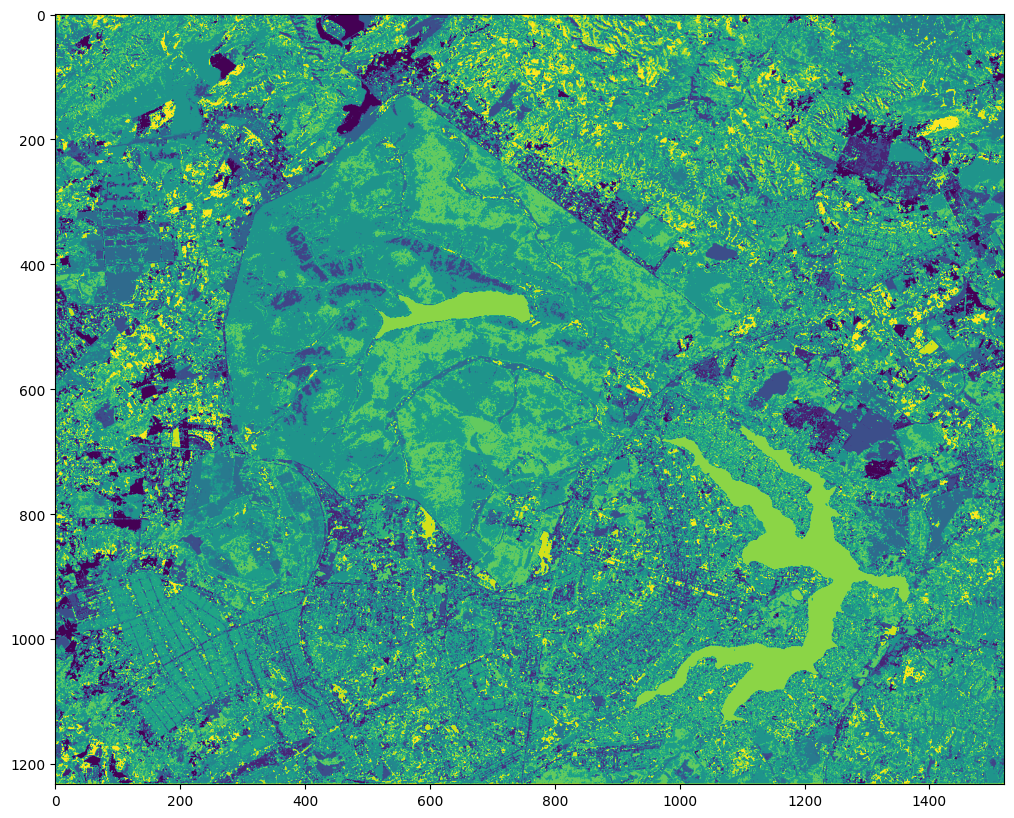

In [ ]:
# Visualizando resultado
plt.figure(figsize=(15,10))
plt.imshow(segmented, cmap='viridis_r')